In [1]:
from collections import namedtuple
import numpy as np
import tt
import time

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

nv = 50
vmax = 2000.
r = 1e-3

hv = 2. * vmax / nv
vx_ = np.linspace(-vmax+hv/2, vmax-hv/2, nv) # coordinates of velocity nodes
    
vx, vy, vz = np.meshgrid(vx_, vx_, vx_, indexing='ij')

vx_tt = tt.tensor(vx).round(r)
vy_tt = tt.tensor(vy).round(r)
vz_tt = tt.tensor(vz).round(r)

In [19]:
xi_n = np.abs((1. / np.sqrt(3)) * (vx + vy + vz))
#xi_n = np.where(xi_nil > 0, xi_nil, 0.)
#xi_n_ = np.where(xi_nil < 0, xi_nil, 0.)
#xi_n = tt.tensor(np.abs((1. / np.sqrt(3)) * (vx + vy + vz)))

In [20]:
X = vx[:, 0, 0]
Y = vy[0, :, 0]

X, Y = np.meshgrid(X, Y)

Z = xi_n[:, :, nv/2]

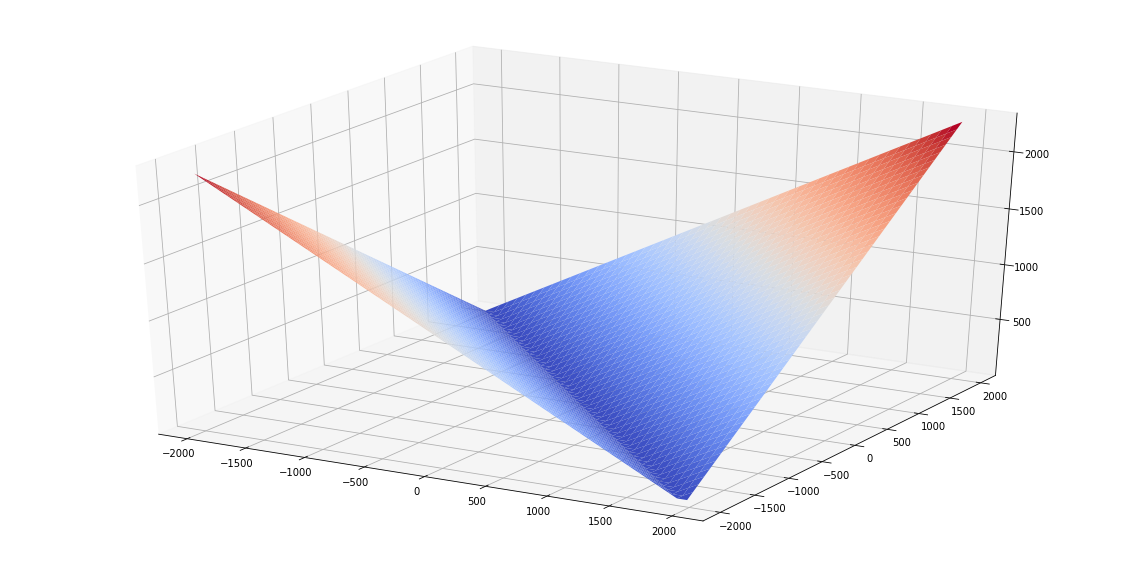

In [21]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

In [22]:
xi_n = tt.tensor(xi_n).round(rmax = 2)
#xi_n_ = tt.tensor(xi_n_).round(rmax = 2)
print xi_n
xi_n = xi_n.full()
#xi_n_ = xi_n_.full()

This is a 3-dimensional tensor 
r(0)=1, n(0)=50 
r(1)=2, n(1)=50 
r(2)=2, n(2)=50 
r(3)=1 



In [24]:
X = vx[:, 0, 0]
Y = vy[0, :, 0]

X, Y = np.meshgrid(X, Y)

Z = xi_n[:, :, nv/2]

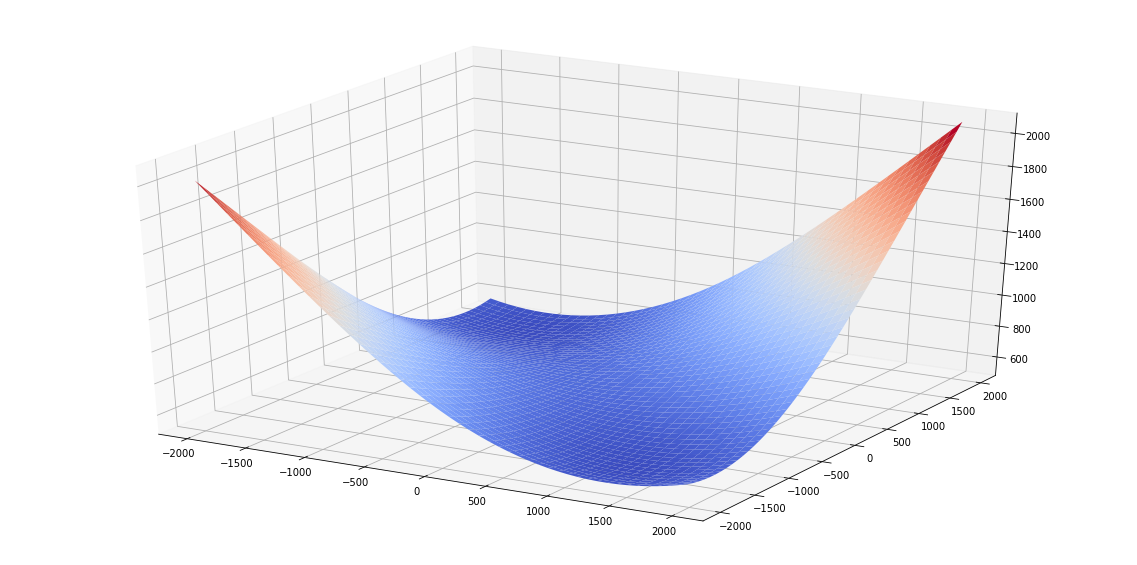

In [25]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

In [26]:
v_est = (vx**2 + vy**2 + vz**2)**0.5

In [27]:
X = vx[:, 0, 0]
Y = vy[0, :, 0]

X, Y = np.meshgrid(X, Y)

Z = v_est[:, :, nv/2]

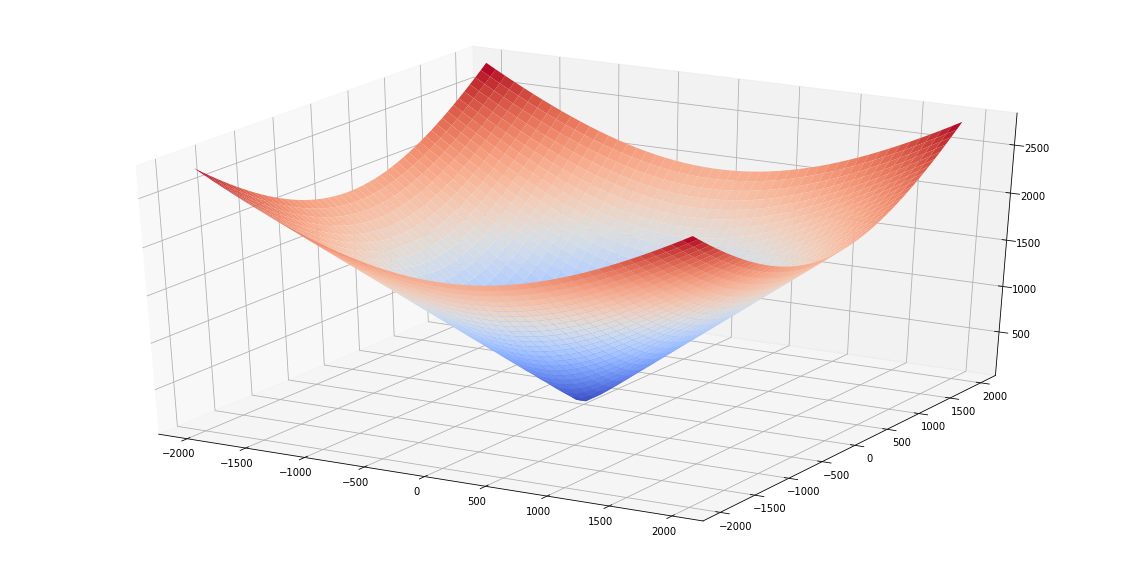

In [28]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

In [66]:
print tt.tensor(v_est).round(r)

This is a 3-dimensional tensor 
r(0)=1, n(0)=50 
r(1)=3, n(1)=50 
r(2)=3, n(2)=50 
r(3)=1 



In [128]:
x = vx[:, 0, 0]

print x

c = 1.

d = np.log(2 )

#a = 1. / (2. * b * Xi * np.exp(- b * Xi * Xi))

#xi_n_est = a * (1. - np.exp(- b * x * x))



[-1960. -1880. -1800. -1720. -1640. -1560. -1480. -1400. -1320. -1240.
 -1160. -1080. -1000.  -920.  -840.  -760.  -680.  -600.  -520.  -440.
  -360.  -280.  -200.  -120.   -40.    40.   120.   200.   280.   360.
   440.   520.   600.   680.   760.   840.   920.  1000.  1080.  1160.
  1240.  1320.  1400.  1480.  1560.  1640.  1720.  1800.  1880.  1960.]


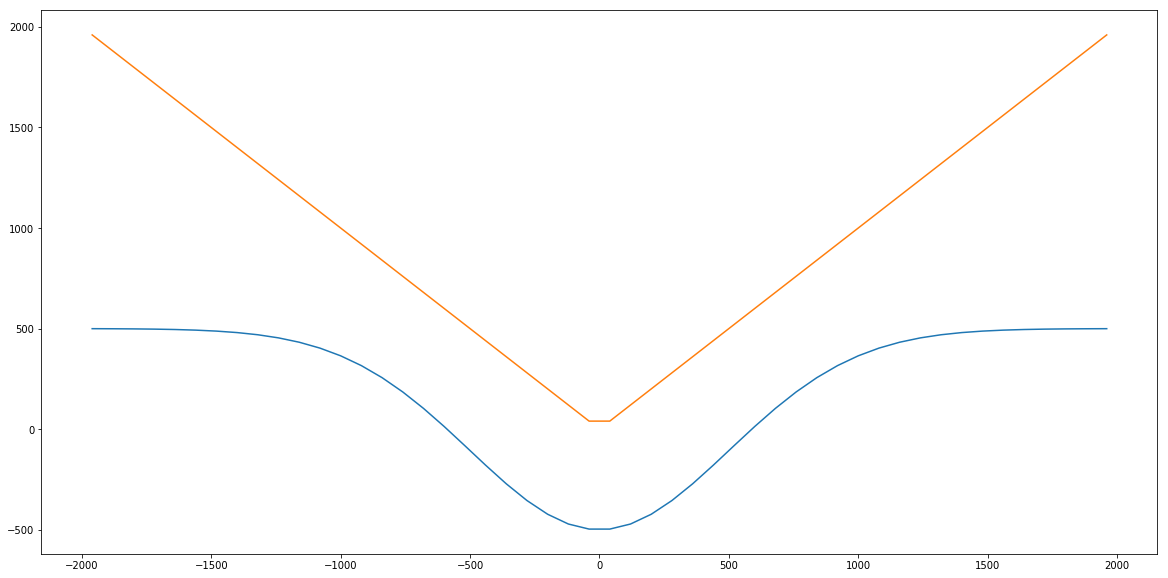

In [146]:
fig, ax = plt.subplots(figsize = (20,10))

ax.plot(x, 500 -1000 * np.exp(- x * x / 500000.))
ax.plot(x, np.abs(x))
plt.show()

1.25643120862617


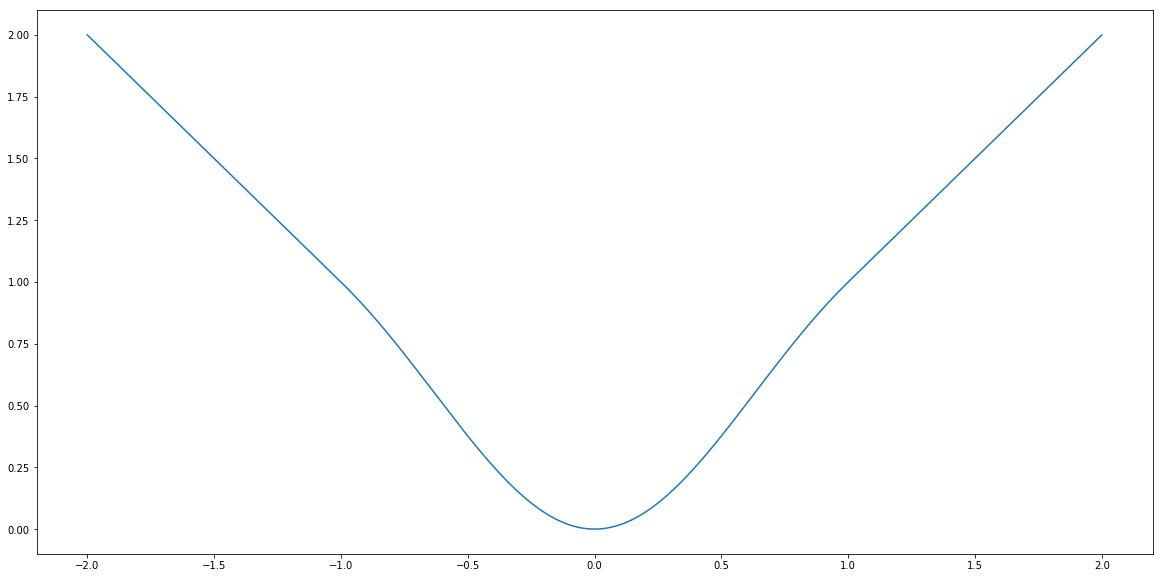

In [167]:
import sympy as smp

c_sym = smp.Symbol('c')
c = smp.nsolve([1 - smp.exp(- c_sym) - 2 * c * smp.exp(-c_sym)], [c_sym], [1])[0]

print c

c = 1.25643120862617

b = 1. / (1. - np.exp(-1. * c))

a = b

xx = np.linspace(-2, 2, 401)

sh = a - b * np.exp(- c * xx * xx)

xi_est = np.abs(xx)

for i in range(xx.size):
    if (np.abs(xx[i]) <= 1):
        xi_est[i] = sh[i]

fig, ax = plt.subplots(figsize = (20,10))

ax.plot(xx, xi_est)
#plt.xlim(0.5, 1.)
plt.show()

In [244]:
c = 1.25643120862617

b = 1. / (1. - np.exp(-1. * c))

a = b

sh = a - b * np.exp(- c * xx * xx)

sh = lambda x: a - b * np.exp(- c * x * x)

def abs_exp(x, Xi):
    
    return np.where((np.abs(x) <= Xi), Xi*sh(x/Xi), np.abs(x))
        

In [277]:
xi_n = abs_exp((1. / np.sqrt(3)) * (vx + vy + vz), vmax/5)

xi_n_tt = tt.tensor(xi_n)

print xi_n_tt

xi_n = xi_n_tt.full()

This is a 3-dimensional tensor 
r(0)=1, n(0)=50 
r(1)=50, n(1)=50 
r(2)=50, n(2)=50 
r(3)=1 



In [278]:
X = vx[:, 0, 0]
Y = vy[0, :, 0]

X, Y = np.meshgrid(X, Y)

Z = xi_n[:, :, nv/2]

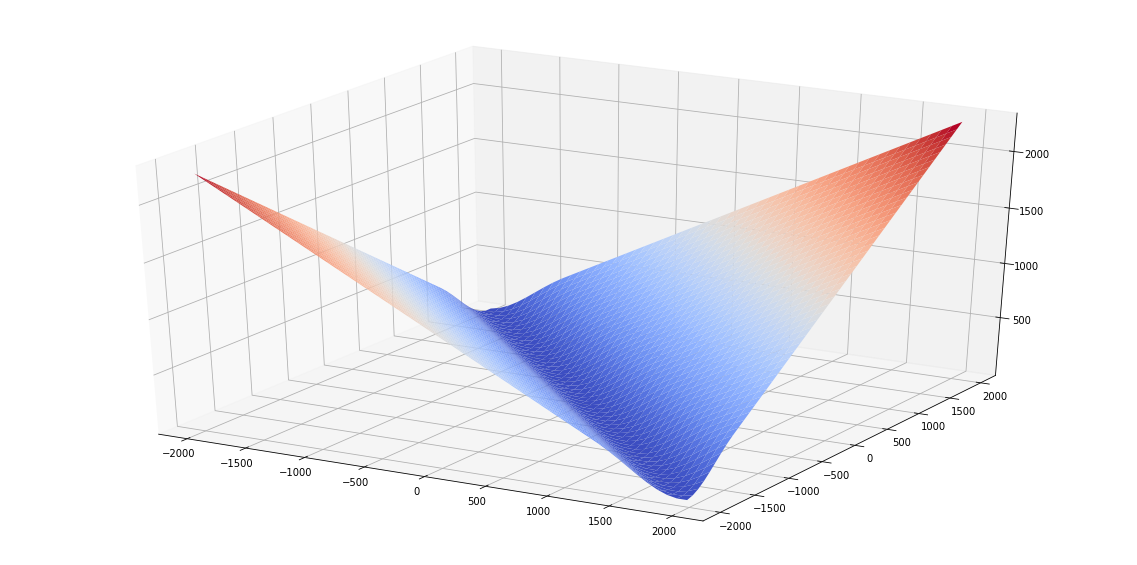

In [279]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

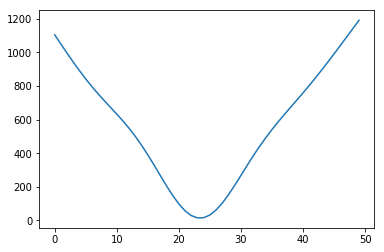

In [252]:
plt.plot(xi_n[:, nv/2, nv/2])

In [38]:
v_nil = []
#    v_nil_max = np.zeros(mesh.nf)
v_nil_tmp = np.zeros((nv, nv, nv))
#    v_nil_minus = []
#    v_nil_plus = []
v_est = []

v_nil_tmp = (1. / np.sqrt(3)) * (vx + vy + vz)
#        v_nil_max[jf] = np.max(np.abs(v_nil_tmp))
v_nil.append(tt.tensor(v_nil_tmp).round(r))
#        v_nil_plus.append(tt.tensor(np.where(v_nil_tmp > 0, v_nil_tmp, 0.)))
#        v_nil_minus.append(tt.tensor(np.where(v_nil_tmp < 0, v_nil_tmp, 0.)))
v_est.append(tt.tensor(np.abs(v_nil_tmp)).round(1e-9, rmax = 2))

print v_est

[This is a 3-dimensional tensor 
r(0)=1, n(0)=50 
r(1)=2, n(1)=50 
r(2)=2, n(2)=50 
r(3)=1 
]
